# Pivot Points Indicator

**Formula (Standard)**:
- PP = (High + Low + Close) / 3
- R1 = 2×PP - Low, S1 = 2×PP - High
- R2 = PP + (High - Low), S2 = PP - (High - Low)
- R3 = High + 2×(PP - Low), S3 = Low - 2×(High - PP)

**Interpretation:**
- Pivot Point: Primary support/resistance level
- R1/R2/R3: Resistance levels above pivot
- S1/S2/S3: Support levels below pivot
- Price tends to range between S1 and R1 (80% of the time)

**Key signals**: Breakout beyond R1/S1 = strong move expected

In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from indikator import pivot_points

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## Scenario 1: Range Trading Between S1 and R1

Pivot Levels for Day 2:
R3: 120.00
R2: 115.00
R1: 110.00
PP: 105.00
S1: 100.00
S2: 95.00
S3: 90.00


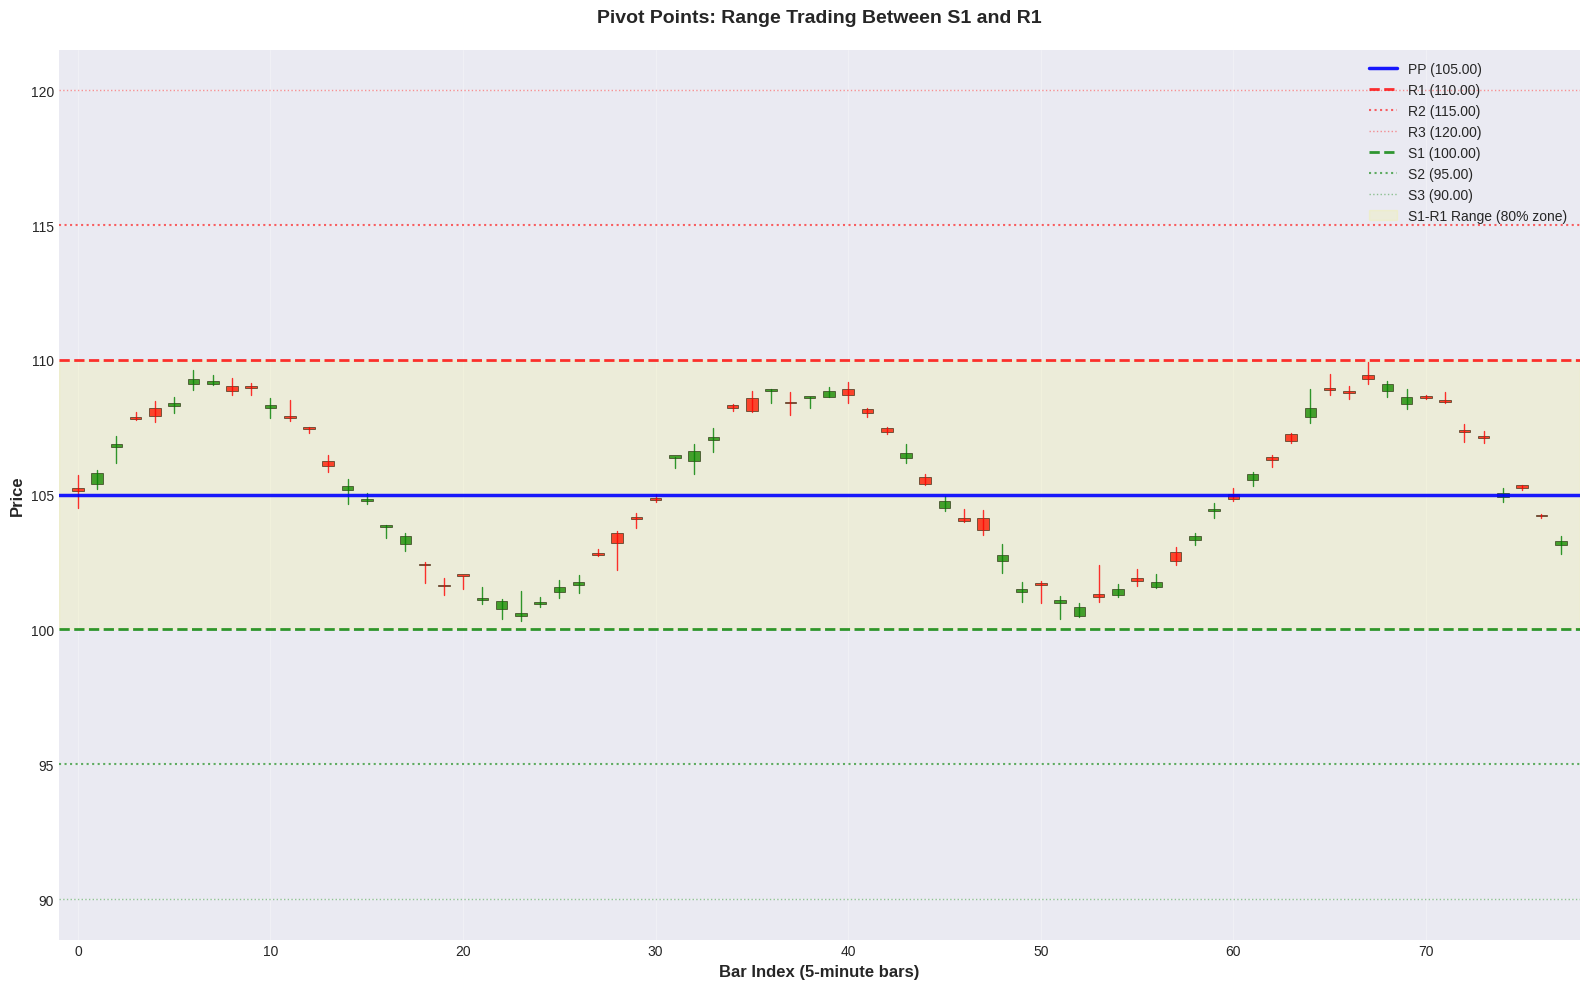


Bars within S1-R1 range: 78/78 (100.0%)
Range size: 10.00 points

Range trading: Buy near S1, sell near R1!


In [2]:
# Create daily data for pivot calculation
dates_daily = pd.date_range('2024-01-01', periods=2, freq='D')
df_daily = pd.DataFrame({
    'high': [110.0, 115.0],
    'low': [100.0, 105.0],
    'close': [105.0, 110.0]
}, index=dates_daily)

# Calculate pivots
pivots = pivot_points(df_daily, method='standard', period='D')

# Get day 2 pivot levels
pp = pivots['pp'].iloc[1]
r1 = pivots['r1'].iloc[1]
r2 = pivots['r2'].iloc[1]
r3 = pivots['r3'].iloc[1]
s1 = pivots['s1'].iloc[1]
s2 = pivots['s2'].iloc[1]
s3 = pivots['s3'].iloc[1]

print(f"Pivot Levels for Day 2:")
print(f"R3: {r3:.2f}")
print(f"R2: {r2:.2f}")
print(f"R1: {r1:.2f}")
print(f"PP: {pp:.2f}")
print(f"S1: {s1:.2f}")
print(f"S2: {s2:.2f}")
print(f"S3: {s3:.2f}")

# Create intraday price action bouncing between S1 and R1
n = 78
dates_intraday = pd.date_range('2024-01-02 09:30', periods=n, freq='5min')

# Price oscillates between S1 and R1
base_price = pp
amplitude = (r1 - s1) / 2 * 0.8
frequency = 2 * np.pi / 30
closes_intraday = base_price + amplitude * np.sin(frequency * np.arange(n)) + np.random.randn(n) * 0.3

# Create OHLC
opens_intraday = closes_intraday + np.random.randn(n) * 0.2
highs_intraday = np.maximum(opens_intraday, closes_intraday) + np.abs(np.random.randn(n)) * 0.3
lows_intraday = np.minimum(opens_intraday, closes_intraday) - np.abs(np.random.randn(n)) * 0.3

# Plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

# Candlesticks
for i in range(n):
    color = 'green' if closes_intraday[i] >= opens_intraday[i] else 'red'
    ax.plot([i, i], [lows_intraday[i], highs_intraday[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(closes_intraday[i] - opens_intraday[i])
    if height < 0.05: height = 0.1
    bottom = min(opens_intraday[i], closes_intraday[i])
    ax.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# Pivot levels
ax.axhline(pp, color='blue', linestyle='-', linewidth=2.5, label=f'PP ({pp:.2f})', alpha=0.9)
ax.axhline(r1, color='red', linestyle='--', linewidth=2, label=f'R1 ({r1:.2f})', alpha=0.8)
ax.axhline(r2, color='red', linestyle=':', linewidth=1.5, label=f'R2 ({r2:.2f})', alpha=0.6)
ax.axhline(r3, color='red', linestyle=':', linewidth=1, label=f'R3 ({r3:.2f})', alpha=0.4)
ax.axhline(s1, color='green', linestyle='--', linewidth=2, label=f'S1 ({s1:.2f})', alpha=0.8)
ax.axhline(s2, color='green', linestyle=':', linewidth=1.5, label=f'S2 ({s2:.2f})', alpha=0.6)
ax.axhline(s3, color='green', linestyle=':', linewidth=1, label=f'S3 ({s3:.2f})', alpha=0.4)

# Highlight S1-R1 range
ax.axhspan(s1, r1, alpha=0.1, color='yellow', label='S1-R1 Range (80% zone)')

ax.set_xlabel('Bar Index (5-minute bars)', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=12, fontweight='bold')
ax.set_title('Pivot Points: Range Trading Between S1 and R1', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, n)

plt.tight_layout()
plt.show()

# Calculate % of bars within S1-R1
within_range = ((closes_intraday >= s1) & (closes_intraday <= r1)).sum()
pct_within = within_range / n * 100
print(f"\nBars within S1-R1 range: {within_range}/{n} ({pct_within:.1f}%)")
print(f"Range size: {r1 - s1:.2f} points")
print(f"\nRange trading: Buy near S1, sell near R1!")

## Scenario 2: Comparison of Pivot Methods

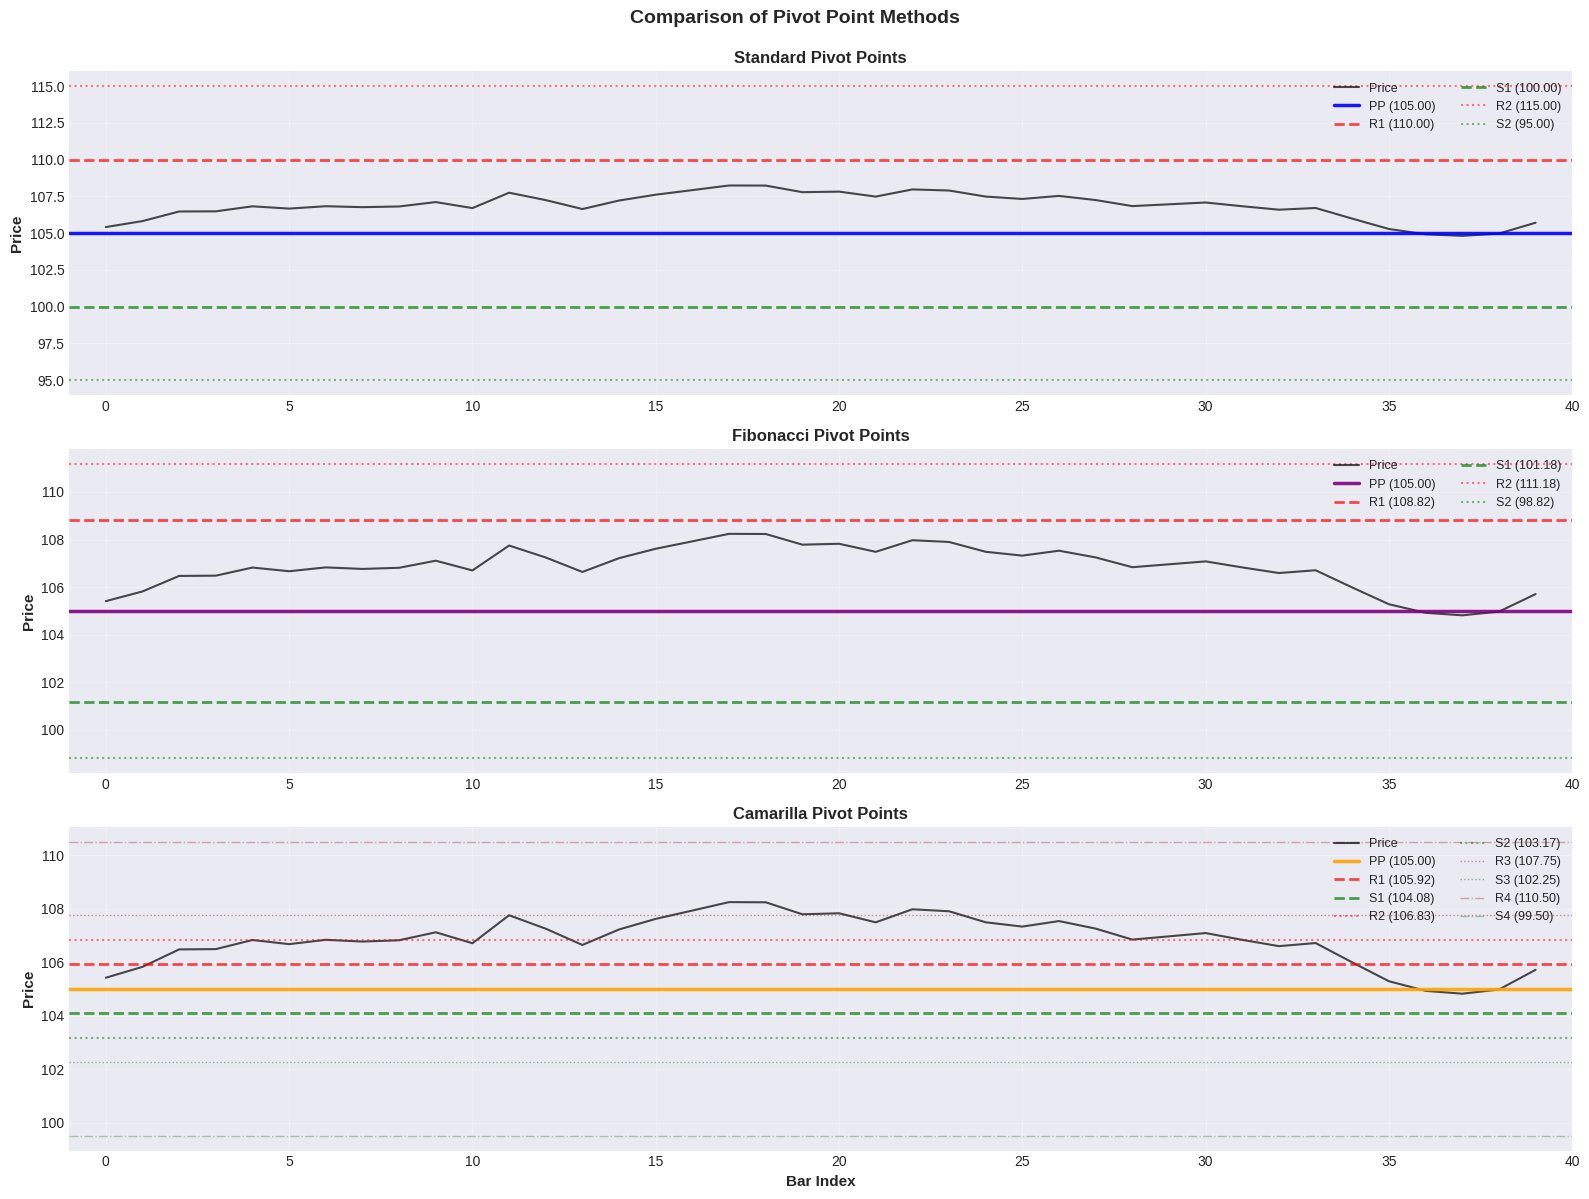


Method Comparison:

Standard (Floor Trader's):
  - Most widely used by floor traders
  - R1-S1 range: 10.00

Fibonacci:
  - Uses Fibonacci ratios (38.2%, 61.8%, 100%)
  - R1-S1 range: 7.64

Camarilla:
  - Tighter levels, 8 levels total (R1-R4, S1-S4)
  - R1-S1 range: 1.83
  - Best for scalping and intraday range trading


In [3]:
# Calculate pivots using different methods
pivots_standard = pivot_points(df_daily, method='standard', period='D')
pivots_fibonacci = pivot_points(df_daily, method='fibonacci', period='D')
pivots_camarilla = pivot_points(df_daily, method='camarilla', period='D')

# Get day 2 levels for each method
methods = {
    'Standard': pivots_standard.iloc[1],
    'Fibonacci': pivots_fibonacci.iloc[1],
    'Camarilla': pivots_camarilla.iloc[1]
}

# Create simple price action
n2 = 40
closes_simple = pp + np.cumsum(np.random.randn(n2) * 0.5)

# Plot comparison
fig = plt.figure(figsize=(16, 12))
colors_method = {'Standard': 'blue', 'Fibonacci': 'purple', 'Camarilla': 'orange'}

for idx, (method_name, levels) in enumerate(methods.items()):
    ax = fig.add_subplot(3, 1, idx + 1)
    
    # Price line
    ax.plot(range(n2), closes_simple, 'black', linewidth=1.5, label='Price', alpha=0.7)
    
    # Pivot levels
    color = colors_method[method_name]
    ax.axhline(levels['pp'], color=color, linestyle='-', linewidth=2.5, label=f"PP ({levels['pp']:.2f})", alpha=0.9)
    ax.axhline(levels['r1'], color='red', linestyle='--', linewidth=2, label=f"R1 ({levels['r1']:.2f})", alpha=0.7)
    ax.axhline(levels['s1'], color='green', linestyle='--', linewidth=2, label=f"S1 ({levels['s1']:.2f})", alpha=0.7)
    
    if 'r2' in levels:
        ax.axhline(levels['r2'], color='red', linestyle=':', linewidth=1.5, label=f"R2 ({levels['r2']:.2f})", alpha=0.5)
    if 's2' in levels:
        ax.axhline(levels['s2'], color='green', linestyle=':', linewidth=1.5, label=f"S2 ({levels['s2']:.2f})", alpha=0.5)
    
    # For Camarilla, show R3/S3/R4/S4
    if method_name == 'Camarilla':
        if 'r3' in levels:
            ax.axhline(levels['r3'], color='darkred', linestyle=':', linewidth=1, label=f"R3 ({levels['r3']:.2f})", alpha=0.4)
        if 's3' in levels:
            ax.axhline(levels['s3'], color='darkgreen', linestyle=':', linewidth=1, label=f"S3 ({levels['s3']:.2f})", alpha=0.4)
        if 'r4' in levels:
            ax.axhline(levels['r4'], color='darkred', linestyle='-.', linewidth=1, label=f"R4 ({levels['r4']:.2f})", alpha=0.3)
        if 's4' in levels:
            ax.axhline(levels['s4'], color='darkgreen', linestyle='-.', linewidth=1, label=f"S4 ({levels['s4']:.2f})", alpha=0.3)
    
    ax.set_ylabel('Price', fontsize=11, fontweight='bold')
    ax.set_title(f'{method_name} Pivot Points', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9, ncol=2)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, n2)

ax.set_xlabel('Bar Index', fontsize=11, fontweight='bold')
plt.suptitle('Comparison of Pivot Point Methods', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nMethod Comparison:")
print("\nStandard (Floor Trader's):")
print(f"  - Most widely used by floor traders")
print(f"  - R1-S1 range: {pivots_standard['r1'].iloc[1] - pivots_standard['s1'].iloc[1]:.2f}")

print("\nFibonacci:")
print(f"  - Uses Fibonacci ratios (38.2%, 61.8%, 100%)")
print(f"  - R1-S1 range: {pivots_fibonacci['r1'].iloc[1] - pivots_fibonacci['s1'].iloc[1]:.2f}")

print("\nCamarilla:")
print(f"  - Tighter levels, 8 levels total (R1-R4, S1-S4)")
print(f"  - R1-S1 range: {pivots_camarilla['r1'].iloc[1] - pivots_camarilla['s1'].iloc[1]:.2f}")
print(f"  - Best for scalping and intraday range trading")

## Key Takeaways

**Pivot Trading Strategies:**

1. **Range Trading (80% of days)**
   - Buy near S1/S2, sell near R1/R2
   - Stop below S2 for longs, above R2 for shorts
   - Target: opposite pivot level

2. **Breakout Trading (20% of days)**
   - Break above R1 = long signal (target R2/R3)
   - Break below S1 = short signal (target S2/S3)
   - Wait for retest of broken level
   - Confirm with volume

3. **Pivot Bounce Trading**
   - Price approaching PP from above = potential bounce support
   - Price approaching PP from below = potential bounce resistance
   - Most reliable at PP and R1/S1

**Method Selection:**

| Method | Best For | Characteristics |
|--------|----------|----------------|
| Standard | General day trading | Wide levels, most liquid |
| Fibonacci | Swing trading | Based on Fib ratios |
| Woodie | Intraday trends | Weighted to close price |
| Camarilla | Scalping | Tight levels, 8 total |

**Timeframe Usage:**
- **Daily Pivots** → Intraday trading (most common)
- **Weekly Pivots** → Swing trading (2-5 days)
- **Monthly Pivots** → Position trading (weeks)

**Trading Rules:**
1. **Above PP** = bullish bias (look for longs at support)
2. **Below PP** = bearish bias (look for shorts at resistance)
3. **S1/R1 holds 80% of time** = primary range boundaries
4. **Break S1/R1** = extended move likely to S2/R2
5. **Reach S3/R3** = extreme, expect reversal

**Best Practices:**
- Calculate pivots using previous period's data
- Combine with volume for confirmation
- Use multiple timeframes (e.g., weekly + daily pivots)
- Respect the levels - they're self-fulfilling prophecies
- Camarilla levels best for high-frequency/scalping
- Standard pivots most reliable for swing trading
- Price tends to test all pivot levels eventually

## Feature Showcase: Safety & Configuration

In [4]:
# Configuration & Validation Showcase
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from indikator import pivot_points

# 1. Configuration with .Config()
print(f"--- Custom pivot_points Configuration ---")
# Even without hyperparameters, Config ensures type safety
custom_pivot_points = pivot_points.Config().make()
print(f"Created: {custom_pivot_points}")

# 2. Validation Safety
print(f"--- Input Validation Safety ---")
try:
    # Attempt to use invalid data (missing columns)
    invalid_data = pd.DataFrame({'volume': [100]}) # Missing high/low/close
    print("Attempting calculation with invalid inputs...")
    pivot_points(invalid_data)
except Exception as e:
    # The @validated decorator automatically catches the issue
    print(f"✓ Validator caught error as expected: {e}")


--- Custom pivot_points Configuration ---
Created: pivot_points()
--- Input Validation Safety ---
Attempting calculation with invalid inputs...
✓ Validator caught error as expected: Validation failed for parameter 'data' in 'pivot_points' (HasColumns): Missing columns: ['high', 'low', 'close']
